In [38]:
import pandas as pd
import json
import os 
import sys
import csv

# plot
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# dir = os.path.join('dataset', 'kaggle-dse')
dir = r"/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models/datasets/Indian/NIFTY_data"

files = os.listdir(dir)
files.sort()
files = [f for f in files]
print(files)

['NIFTY_2008.csv', 'NIFTY_2008_2020.csv', 'NIFTY_2009.csv', 'NIFTY_2010.csv', 'NIFTY_2011.csv', 'NIFTY_2012.csv', 'NIFTY_2013.csv', 'NIFTY_2014.csv', 'NIFTY_2015.csv', 'NIFTY_2016.csv', 'NIFTY_2017.csv', 'NIFTY_2018.csv', 'NIFTY_2019.csv', 'NIFTY_2020.csv']


In [40]:
# List to store the data from all CSV files
data = []

# Loop through the files
for f in files:
    # Load each CSV file into a DataFrame and append to the list
    file_path = os.path.join(dir, f)
    data.append(pd.read_csv(file_path))

# Check the number of loaded CSV files
len(data)

14

In [41]:
# convert to pandas dataframe
dfs = []
for i in range(1,len(data)):
    dfs.append(pd.DataFrame(data[i]))
df = pd.concat(dfs)

In [42]:
df.shape

(2286554, 7)

In [43]:
df

,Instrument,Date,Time,Open,High,Low,Close
0,NIFTY,20080101,09:55,6138.60,6154.60,6138.60,6148.90
1,NIFTY,20080101,09:56,6149.75,6149.75,6132.80,6132.80
2,NIFTY,20080101,09:57,6138.25,6138.25,6127.95,6127.95
3,NIFTY,20080101,09:58,6127.15,6127.15,6120.90,6120.90
4,NIFTY,20080101,09:59,6118.05,6118.05,6113.55,6113.90
...,...,...,...,...,...,...,...
94879,NIFTY,20201231,15:28,13977.90,13981.55,13977.90,13978.45
94880,NIFTY,20201231,15:29,13980.20,13980.45,13966.20,13967.40
94881,NIFTY,20201231,15:30,13968.65,13971.10,13965.20,13967.00
94882,NIFTY,20201231,15:31,13967.20,13967.20,13967.20,13967.20


In [44]:
# count the unique values in the column
df = df.drop_duplicates(subset=['Date', 'Instrument', 'Time'])
print(df['Instrument'].value_counts())

Instrument
NIFTY    1180080
Name: count, dtype: int64


/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_35866/1578876842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_35866/1578876842.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_35866/1578876842.py:12: SettingWithCopyWarning: 
A value is trying to be set

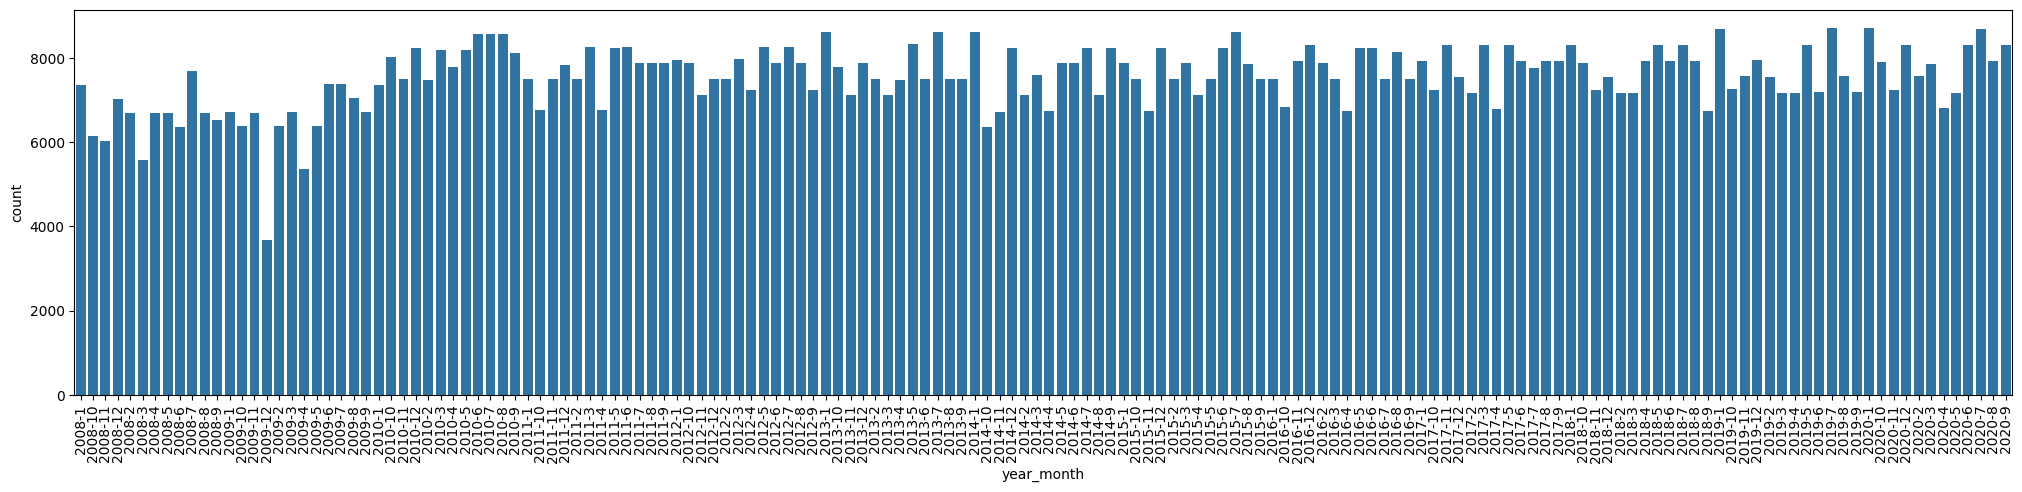

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date' column from YYYYMMDD format to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Convert 'Time' column from HH:MM format to a time object
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Combine 'Date' and 'Time' into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Extract 'year' and 'month' from the 'DateTime' column
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month

# Create a new column 'year_month' for plotting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

# Plot the count of entries per year-month
plt.figure(figsize=(25, 5))
sns.countplot(x='year_month', data=df, order=sorted(df['year_month'].unique()))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [46]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

Instrument    0
Date          0
Time          0
Open          0
High          0
Low           0
Close         0
DateTime      0
year          0
month         0
year_month    0
dtype: int64


In [47]:
df['year'].value_counts()

year
2010    96683
2020    94884
2017    93186
2013    93003
2012    92763
2015    92624
2018    92517
2019    92415
2011    92387
2016    92355
2014    90824
2008    79542
2009    76897
Name: count, dtype: int64

In [48]:
df['Instrument'].value_counts()

Instrument
NIFTY    1180080
Name: count, dtype: int64